**EDA / Exploratory Data Analysis**

Евгений Борисов esborisov@sevsu.ru

* проверка на пропуски
* проверка на дубликаты
* проверка на противоречивую разметку
* статистические характеристики: корреляции, распределения, персентили
* поиск аномалий
* визуализация, признаки попарно, PCA, статистики

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:,.3f}'.format

#  загружаем данные

In [3]:
# pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo 
data = fetch_ucirepo(id=186) 

# изучаем структуру

In [5]:
display( list(data) )

['data', 'metadata', 'variables']

In [6]:
display( list(data['metadata']) )

['uci_id',
 'name',
 'repository_url',
 'data_url',
 'abstract',
 'area',
 'tasks',
 'characteristics',
 'num_instances',
 'num_features',
 'feature_types',
 'demographics',
 'target_col',
 'index_col',
 'has_missing_values',
 'missing_values_symbol',
 'year_of_dataset_creation',
 'last_updated',
 'dataset_doi',
 'creators',
 'intro_paper',
 'additional_info']

In [7]:
print(data['metadata']['abstract'])

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).


In [8]:
# !mkdir data

In [9]:
# with open('data/metadata-abstract.txt','wt') as f: f.write(data['metadata']['abstract'])

In [10]:
display( data['variables'] )

,name,role,type,demographic,description,units,missing_values
0,fixed_acidity,Feature,Continuous,None,None,None,no
1,volatile_acidity,Feature,Continuous,None,None,None,no
2,citric_acid,Feature,Continuous,None,None,None,no
3,residual_sugar,Feature,Continuous,None,None,None,no
4,chlorides,Feature,Continuous,None,None,None,no
5,free_sulfur_dioxide,Feature,Continuous,None,None,None,no
6,total_sulfur_dioxide,Feature,Continuous,None,None,None,no
7,density,Feature,Continuous,None,None,None,no
8,pH,Feature,Continuous,None,None,None,no
9,sulphates,Feature,Continuous,None,None,None,no


In [11]:
# data['variables'].to_csv('data/variables.csv',sep='\t',index=False)

In [12]:
list(data['data'])

['ids', 'features', 'targets', 'original', 'headers']

In [13]:
display(data['data']['original'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,red
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5,red
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5,red
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6,red
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.200,0.210,0.290,1.600,0.039,24.000,92.000,0.991,3.270,0.500,11.200,6,white
6493,6.600,0.320,0.360,8.000,0.047,57.000,168.000,0.995,3.150,0.460,9.600,5,white
6494,6.500,0.240,0.190,1.200,0.041,30.000,111.000,0.993,2.990,0.460,9.400,6,white
6495,5.500,0.290,0.300,1.100,0.022,20.000,110.000,0.989,3.340,0.380,12.800,7,white


In [14]:
df = data['data']['original']
display(len(df))
display(df.sample(3))

6497

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6366,6.600,0.190,0.250,1.200,0.052,34.000,181.000,0.994,3.300,0.420,9.400,7,white
3621,7.600,0.340,0.390,7.600,0.040,45.000,215.000,0.997,3.110,0.530,9.200,6,white
938,7.200,0.380,0.380,2.800,0.068,23.000,42.000,0.994,3.340,0.720,12.900,7,red


In [15]:
del data

In [16]:
# df.to_csv('data/data.csv',sep='\t',index=False)

In [17]:
# df = pd.read_csv('data/data.csv',sep='\t')
# display(len(df))
# display(df.sample(3))

In [18]:
# df['id'] = range(len(df))

# изучение и визуализация данных

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [20]:
set(df['color'])

{'red', 'white'}

In [21]:
# заменяем название на номер
df['color_'] = pd.Categorical(df['color']).codes

In [22]:
set(df['quality'])

{3, 4, 5, 6, 7, 8, 9}

In [23]:
# сквозная нумерация классов от нуля
# df['target'] = pd.Categorical(df['quality']).codes 
df['target'] = df['quality']

In [24]:
display(df.sample(4))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,color_,target
1814,5.800,0.260,0.240,9.200,0.044,55.000,152.000,0.996,3.310,0.380,9.400,5,white,1,5
6265,6.400,0.310,0.530,8.800,0.057,36.000,221.000,0.996,3.170,0.440,9.100,5,white,1,5
5156,8.100,0.200,0.280,0.900,0.023,49.000,87.000,0.991,2.920,0.360,11.100,6,white,1,6
5572,6.300,0.270,0.510,7.600,0.049,35.000,200.000,0.995,3.160,0.540,9.400,4,white,1,4


In [25]:
# список признаков
cols_features =[
#    'id',
    'fixed_acidity',
    'volatile_acidity',
    'citric_acid',
    'residual_sugar',
    'chlorides',
    'free_sulfur_dioxide',
    'total_sulfur_dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
#    'color',
    'color_',
#    'target'
#    'quality',    
]

## проверка на пропуски

In [26]:
df.isna().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
color                   False
color_                  False
target                  False
dtype: bool

In [27]:
# from sklearn.impute import KNNImputer
# Метод ближайших соседей (KNN): учитывает значения признаков ближайших объектов для заполнения пропусков. 
# Перед применением метода нужно закодировать или удалить категориальные признаки, работает только с числовыми.

## проверка на дубликаты

In [28]:
# проверка на дубликаты
display( len(df) )
display( len( df[cols_features].drop_duplicates() ) )
display( len( df[cols_features+['target']].drop_duplicates() ) )
# ЕСТЬ ДУБЛИКАТЫ ЗАПИСЕЙ

6497

5320

5320

In [29]:
# удаляем дубликаты
# display( len(df) )
# df = df.drop_duplicates(cols_features+['target']).reset_index(drop=True)
# display( len(df) )
# display( df.sample(3) )

## проверка на противоречивую разметку

In [30]:
# проверка на противоречивую разметку
# т.е. таблица НЕ должна содержать одинаковых но разноразмеченных примеров
assert (df.groupby(cols_features)['target'].apply(set).reset_index()['target'].str.len()==1).all() 

## сбалансированность датасета

In [31]:
df['id'] = range(len(df))
df.groupby('target')[['id']].count().T #.`plot.barh()
# датасет не сбалансирован 

target,3,4,5,6,7,8,9
id,30,216,2138,2836,1079,193,5


## распределения признаков

In [32]:
from matplotlib import pyplot as plt

In [33]:
# import seaborn as sns
# sns.pairplot(df[cols_features+['target']], hue='target',palette='viridis')
# plt.show()

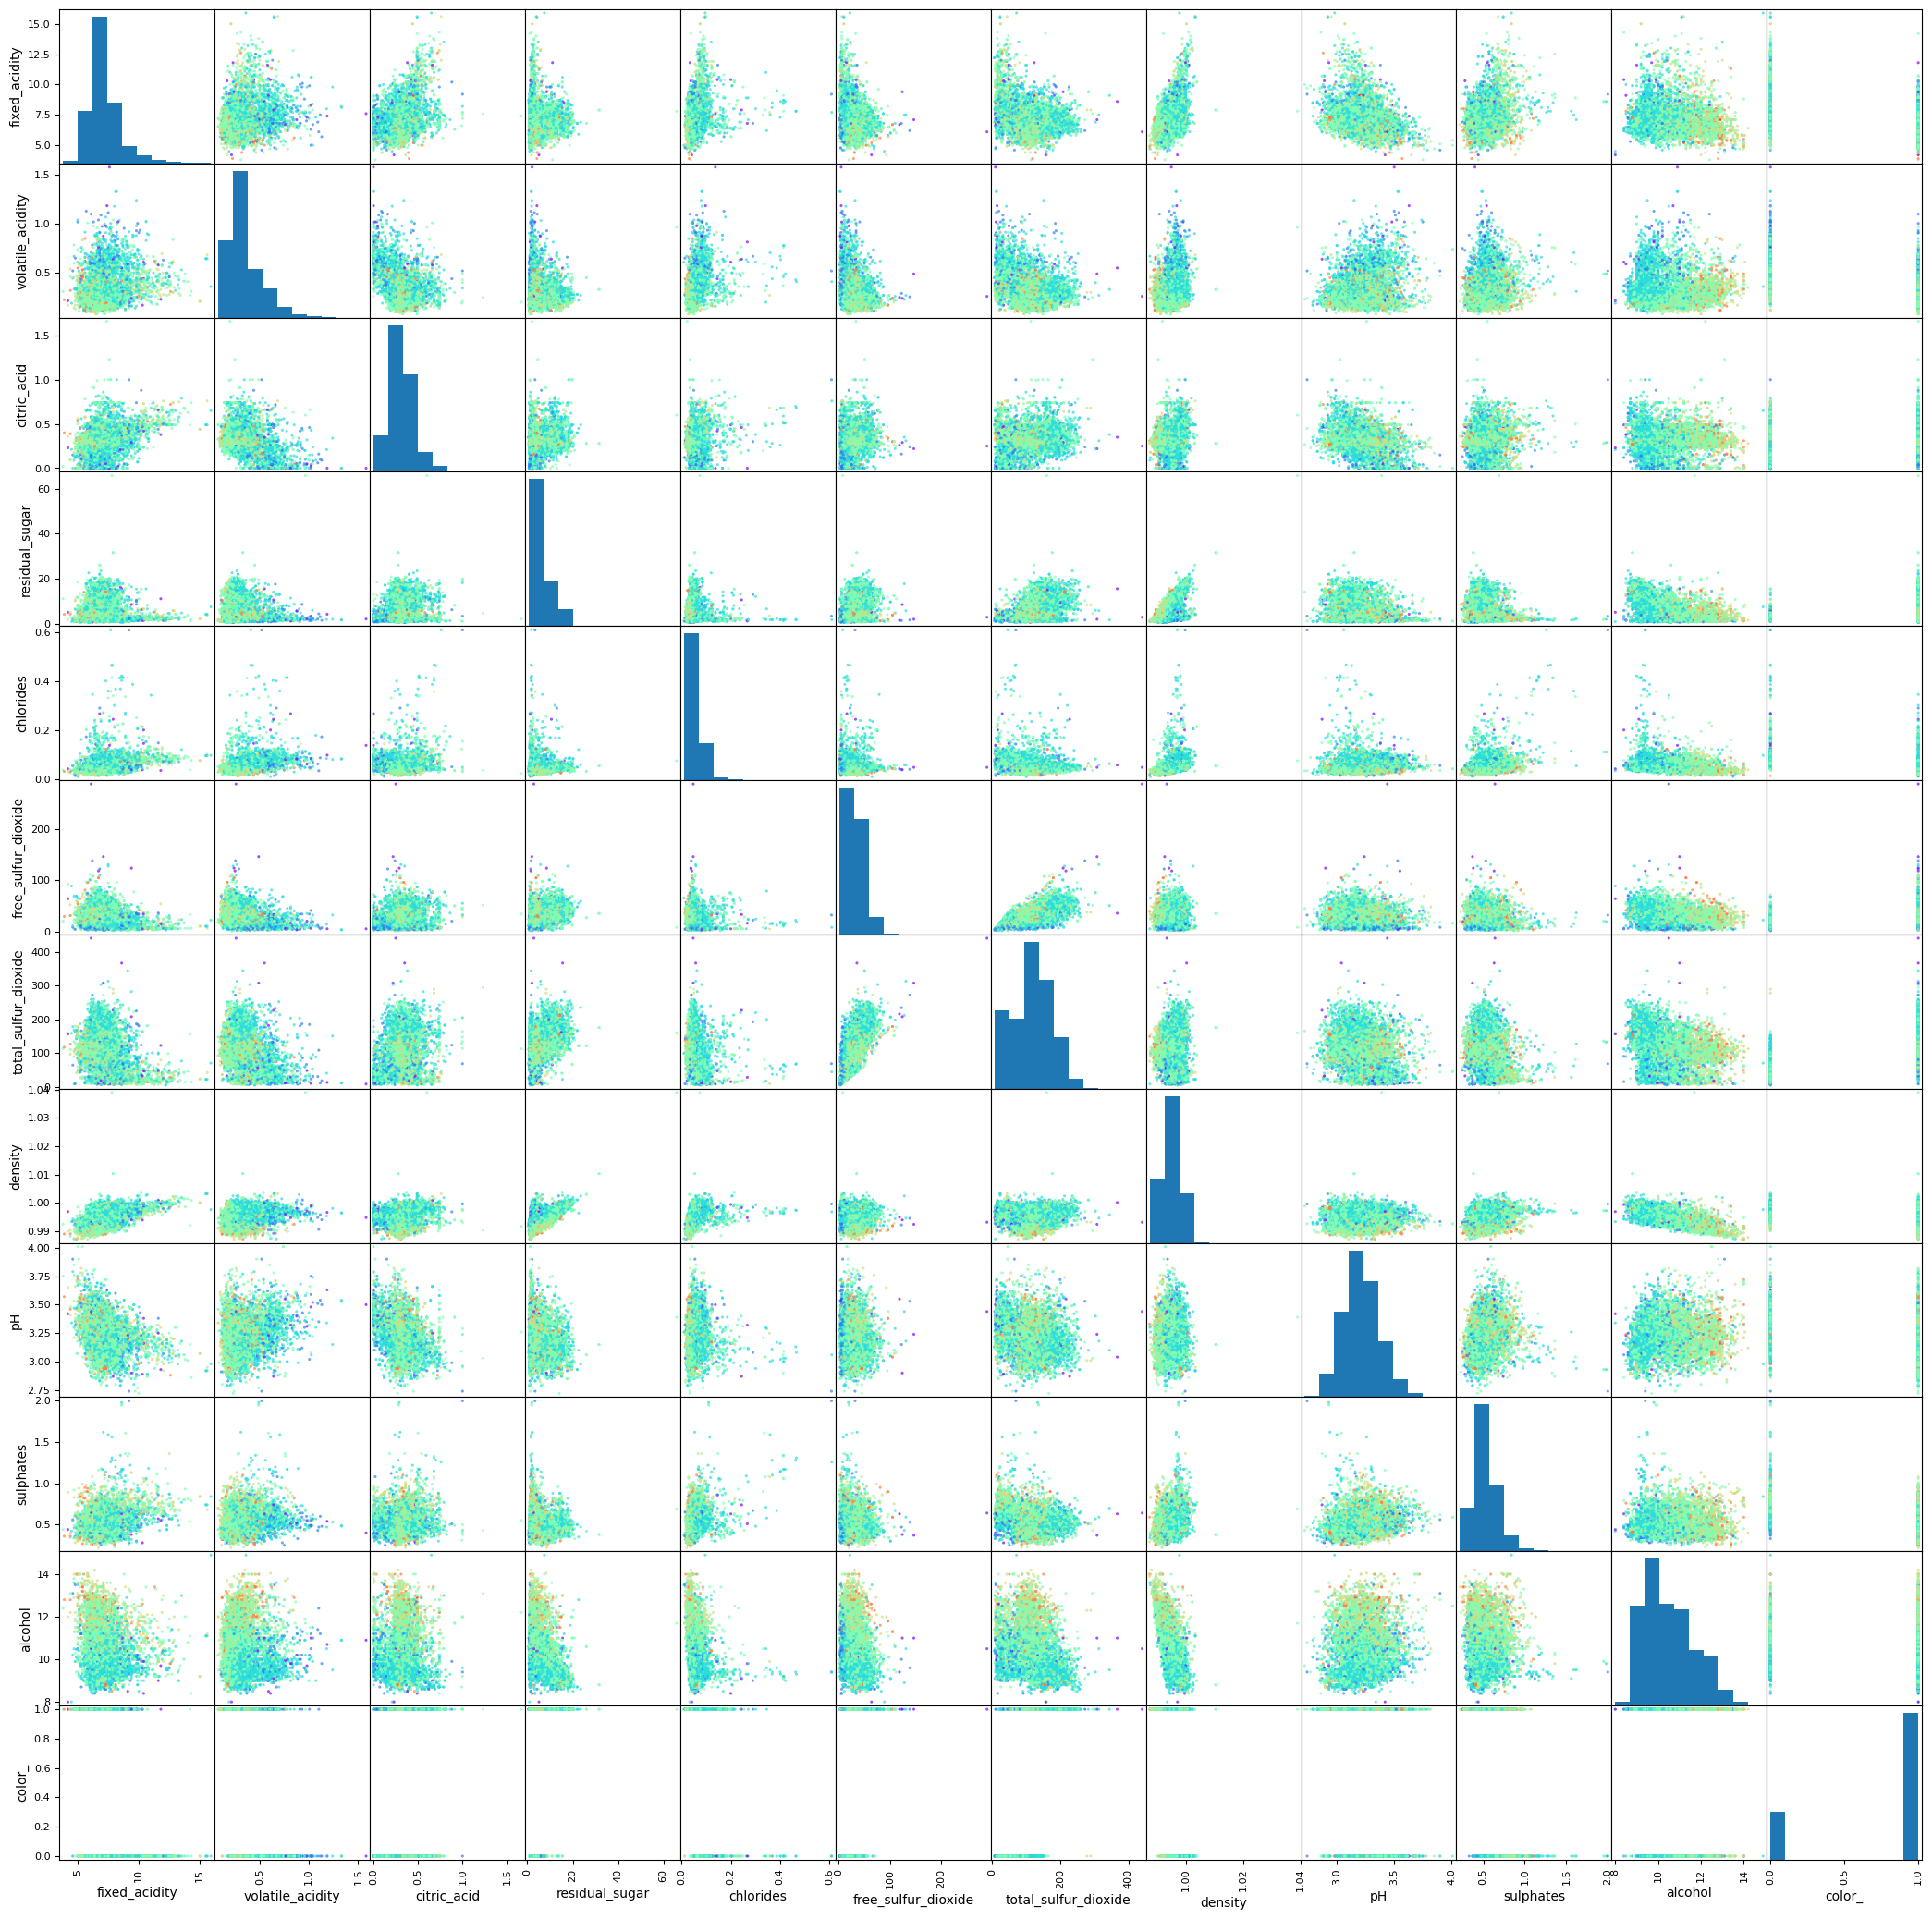

In [34]:
from pandas.plotting import scatter_matrix

scatter_matrix(
        df[cols_features], 
        figsize=(26, 26), 
        diagonal='hist', 
        alpha=.7, 
        s=5, 
        marker='o',
        c=df['target'],
        cmap='rainbow',    
    )
plt.show()

In [35]:
# сбалансированность датасета
df['id'] = range(len(df))
display( df.groupby('target')[['id']].count().T )
# 9-тый target - очень мало значений для анализа

target,3,4,5,6,7,8,9
id,30,216,2138,2836,1079,193,5


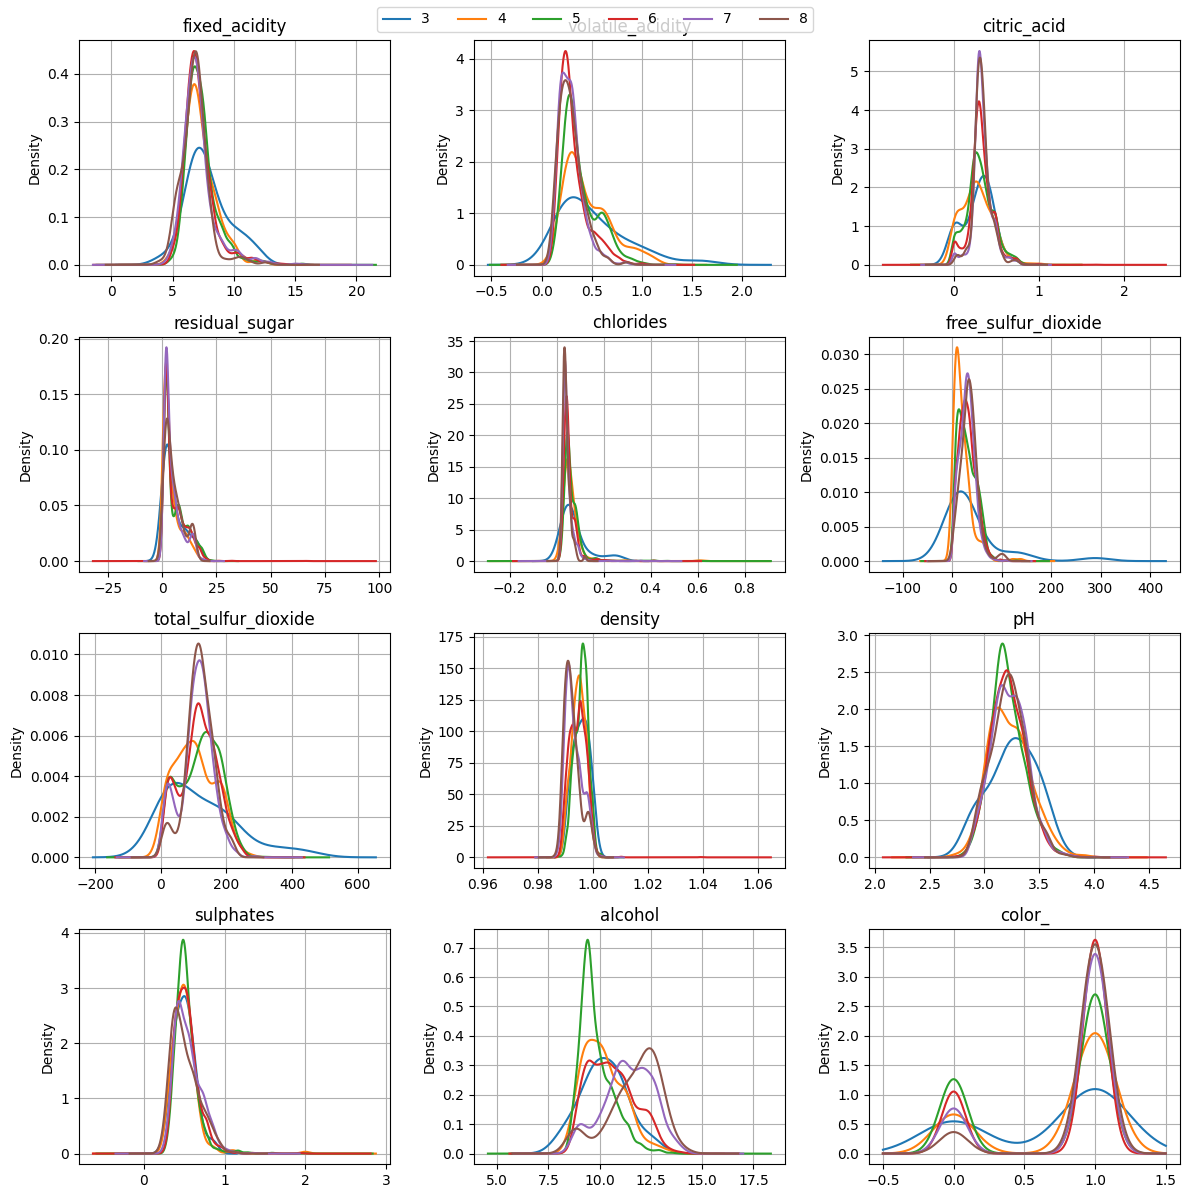

In [36]:
# распределения признаков
n_cols_plot = 3
n_features = len(cols_features)
n_rows_plot = int(np.ceil(len(cols_features)/n_cols_plot))

fig = plt.figure( figsize=(4*n_cols_plot,3*n_rows_plot) )
for n,f in enumerate(cols_features):
    ax = plt.subplot(n_rows_plot,n_cols_plot,n+1) 
    # 9-тый target - очень мало значений для анализа
    df[df['target']!=9].groupby('target')[f].plot.kde(ax=ax)
    ax.set_title(f)
    ax.grid()

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',ncol=n_features-1)  
plt.tight_layout()
plt.show()

## зависимость признаков и таргета

In [37]:
df_corr = df[cols_features+['target']].corr()
display( df_corr.style.background_gradient(axis=None, vmin=-1, vmax=1, cmap='rainbow') )

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_,target
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.486740,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.653036,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.187397,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,0.348821,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.512678,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.471644,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,0.700357,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.390645,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,-0.329129,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.487218,0.038485


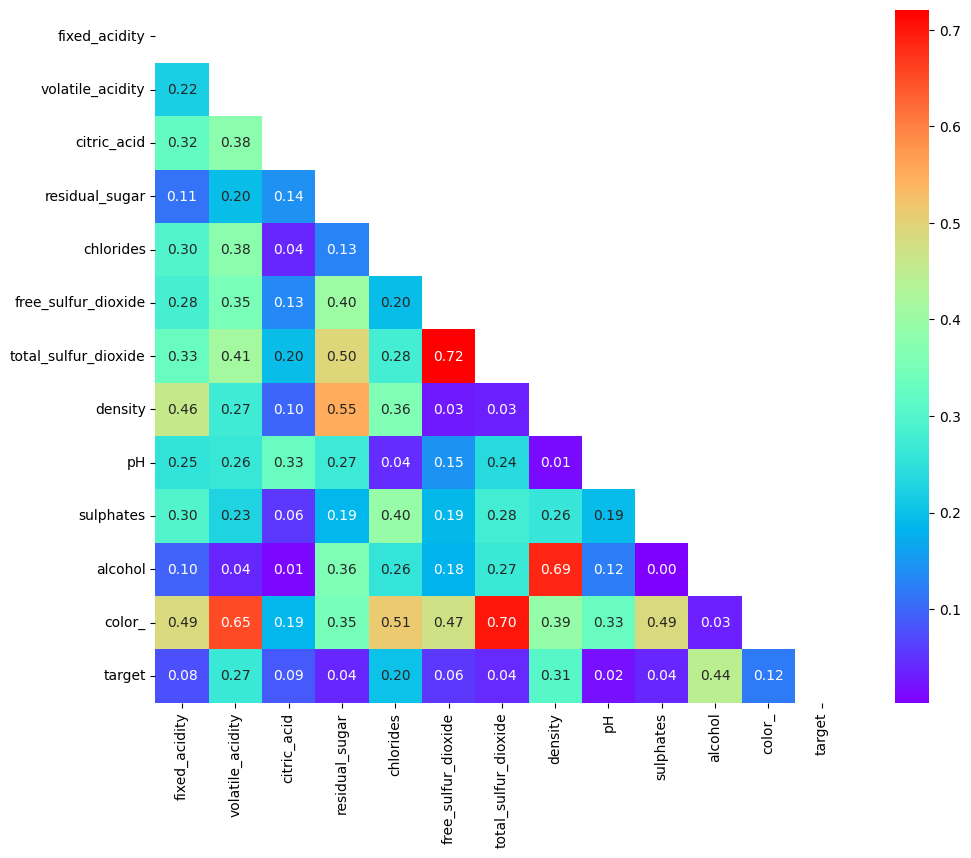

In [38]:
import seaborn as sns

mask = np.triu(np.ones_like(df_corr, dtype=bool))
plt.figure(figsize=(12,9))
sns.heatmap(
    df_corr.abs(), 
    mask=mask, 
    #center=0, 
    annot=True, 
    fmt='.2f', 
    square=True, 
    cmap='rainbow'
)
plt.show()

## поиск выбросов

Гистограмма и ящик с усами на пальцах   
https://habr.com/ru/articles/267123/

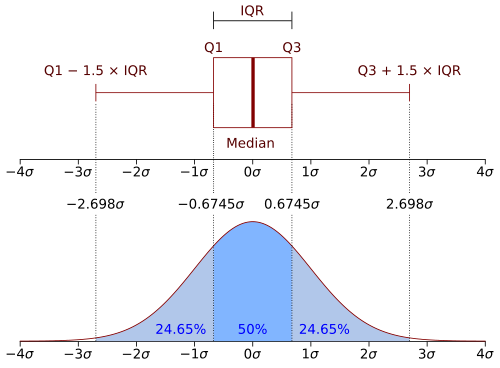

Pandas boxplot   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

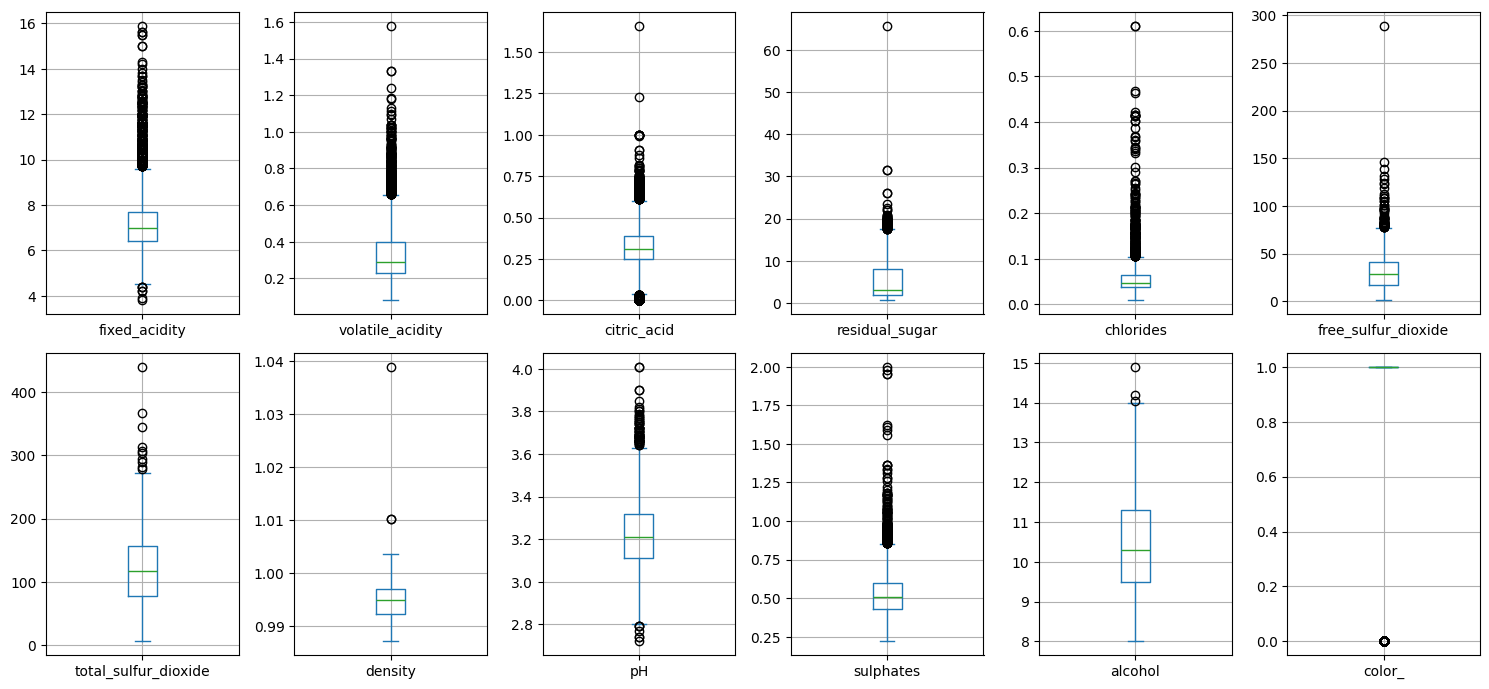

In [39]:
# распределения признаков
n_cols_plot = 6
n_features = len(cols_features)
n_rows_plot = int(np.ceil(len(cols_features)/n_cols_plot))

df[cols_features].plot.box(subplots=True,layout=(n_rows_plot,n_cols_plot),figsize=(15,7),sharey=False,grid=True)
plt.tight_layout()
plt.show()

----

In [40]:
q = [.05,.10,.25,.50,.75,.90,.95]
df[cols_features].describe(q).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
fixed_acidity,"6,497.000",7.215,1.296,3.800,5.700,6.000,6.400,7.000,7.700,8.800,9.800,15.900
volatile_acidity,"6,497.000",0.340,0.165,0.080,0.160,0.180,0.230,0.290,0.400,0.590,0.670,1.580
citric_acid,"6,497.000",0.319,0.145,0.000,0.050,0.140,0.250,0.310,0.390,0.490,0.560,1.660
residual_sugar,"6,497.000",5.443,4.758,0.600,1.200,1.300,1.800,3.000,8.100,13.000,15.000,65.800
chlorides,"6,497.000",0.056,0.035,0.009,0.028,0.031,0.038,0.047,0.065,0.086,0.102,0.611
free_sulfur_dioxide,"6,497.000",30.525,17.749,1.000,6.000,9.000,17.000,29.000,41.000,54.000,61.000,289.000
total_sulfur_dioxide,"6,497.000",115.745,56.522,6.000,19.000,30.000,77.000,118.000,156.000,188.000,206.000,440.000
density,"6,497.000",0.995,0.003,0.987,0.990,0.991,0.992,0.995,0.997,0.998,0.999,1.039
pH,"6,497.000",3.219,0.161,2.720,2.970,3.020,3.110,3.210,3.320,3.420,3.500,4.010
sulphates,"6,497.000",0.531,0.149,0.220,0.350,0.370,0.430,0.510,0.600,0.720,0.790,2.000


In [41]:
# df.clip?

In [42]:
# from sklearn.linear_model import RANSACRegressor

----

Выявляем аномалии с помощью Isolation Forest   
https://habr.com/ru/companies/otus/articles/881086/

* Строим дерево, где каждый узел случайно выбирает один признак и случайное значение разбиения.
* Рекурсивно делим данные, пока каждая точка не окажется в своём отдельном листе.
* Считаем аномальность точки по тому, насколько быстро она была изолирована (чем короче путь, тем аномальнее).

In [43]:
# IsolationForest?

In [44]:
from sklearn.ensemble import IsolationForest

df['is_anomaly'] = IsolationForest(contamination=0.01).fit_predict(df[cols_features])==-1

In [45]:
df.groupby(['target','is_anomaly'])[['id']].count()

id
target is_anomaly      
3      False         15
       True          15
4      False        199
       True          17
5      False       2017
       True         121
6      False       2723
       True         113
7      False       1028
       True          51
8      False        185
       True           8
9      False          5

In [ ]:
from sklearn.decomposition import PCA
X2 = PCA(n_components=2).fit_transform(df[cols_features].values)
display( X2.shape )

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(X2[df['is_anomaly'], 0], X2[df['is_anomaly'], 1],label='outliers',s=1,c='r')
ax.scatter(X2[~df['is_anomaly'], 0], X2[~df['is_anomaly'], 1],label='inliers',s=1,c='b',alpha=0.1)
ax.grid()
ax.legend()
plt.show()

In [ ]:
# df_anom = df.query('is_anomaly').reset_index(drop=True)
# df = df.query('~is_anomaly').reset_index(drop=True)
# display( len(df),len(df_anom) )

## отбор признаков



Построение и отбор признаков. Часть 2: feature selection   
https://proglib.io/p/postroenie-i-otbor-priznakov-chast-2-feature-selection-2021-09-25

Методы отбора фич   
https://habr.com/ru/articles/264915/

Отбор признаков в задачах машинного обучения. Часть 1   
https://habr.com/ru/articles/550978/

In [ ]:
# X = df[cols_features_].values
# X = df[cols_features].values

In [ ]:
# import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

#importances = mutual_info_classif(df[cols_features].values, df['target_'].values)
importances = mutual_info_classif(df[cols_features].values, df['target'].values)
importances = pd.Series(importances, cols_features).sort_values()
importances.plot(kind='barh', color='teal',grid=True)
plt.show()

In [ ]:
cols_features_ = list(importances.sort_values(ascending=False).head(5).index)
cols_features_

In [ ]:
# from pandas.plotting import scatter_matrix
# # from matplotlib import colors as mcolors
# # colors = list(mcolors.CSS4_COLORS.keys()) 
# # colors = np.random.permutation(colors)
# colors = ['blue','green','red','cyan','magenta','yellow','black',]
# colors = { n:c for n,c in enumerate(colors) }

# scatter_matrix(
#         df[cols_features_], 
#         figsize=(7,7), 
#         diagonal='kde', 
#         alpha=.5, 
#         s=4, 
#         color=df['target'].map(colors) 
#     )
# plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(df[cols_features_+['target']], hue='target',palette='rainbow')
#sns.pairplot(df[cols_features_+['target_']], hue='target_',palette='viridis')
plt.show()

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# fsel = SelectKBest(chi2, k=4).fit( df[cols_features], df['target'])
# fsel.pvalues_
# # X = SelectKBest(chi2, k=4).fit_transform( df[cols_features], df['target'])

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVR
# support = RFE(SVR(kernel="linear"), n_features_to_select=5, step=1).fit(df[cols_features].values, df['target'].values ).support_

In [ ]:
# X = df[cols_features_].values
X = df[cols_features].values
# y = df['target_'].values
y = df['target'].values
display( X.shape,y.shape )

In [ ]:
from sklearn.decomposition import PCA
X2 = PCA(n_components=2).fit_transform(X)
display( X2.shape )

In [ ]:
# from sklearn.manifold import TSNE
# X2 = TSNE(n_components=2).fit_transform(X)
# display( X2.shape )

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
for c in sorted(set(y)): # for c in [3,4]: 
    ax.scatter(X2[y==c, 0], X2[y==c, 1],s=1,label=f'{c}')
ax.grid()
ax.legend()
plt.show()